In [1]:
import cv2
import requests

image_path = "data/synthetic_faces.jpg"
#image_path = "data/synthetic_faces_2.png"
#image_path = "data/synthetic_faces_3.jpg"

subscription_key = "9402fb780e0d4698a701867352841eb2"
face_api_url = 'https://northeurope.api.cognitive.microsoft.com/face/v1.0/detect'
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}
params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'emotion'}

In [2]:
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img_data = cv2.imencode('.jpeg', img)[1].tostring()
response = requests.post(face_api_url, params=params, headers=headers, data=img_data)
faces = response.json()

In [3]:
face_count = 0
face_loc = []
emotions = []
em_arr = [0, 0, 0, 0, 0, 0, 0, 0]

In [4]:
for face in faces:
    face_count += 1
    fa = face["faceAttributes"]
    face_loc.append(tuple(list(face['faceRectangle'].values())))
    emotions.append(max(fa['emotion'].keys(), key=lambda k: fa['emotion'][k]))
    for j in range(0, 8):
        em_arr[j] += list(fa['emotion'].values())[j]

for j in range(0, 8):
    em_arr[j] = em_arr[j] / face_count

happy_emo = em_arr[4] + em_arr[7]
sad_emo = em_arr[0] + em_arr[1] + em_arr[2] + em_arr[3] + em_arr[6]

for (bottom, left, top, right), emo in zip(face_loc, emotions):
    top += bottom
    right += left
    cv2.rectangle(img, (int(right), int(bottom)), (int(left), int(top)), (255, 0, 0), 2)
    
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.rectangle(img, (right, bottom - 35),(left, bottom), (255, 0, 0), cv2.FILLED)
    cv2.putText(img, emo, (left + 6, bottom - 10), font, 0.63, (255, 255, 255), 1)

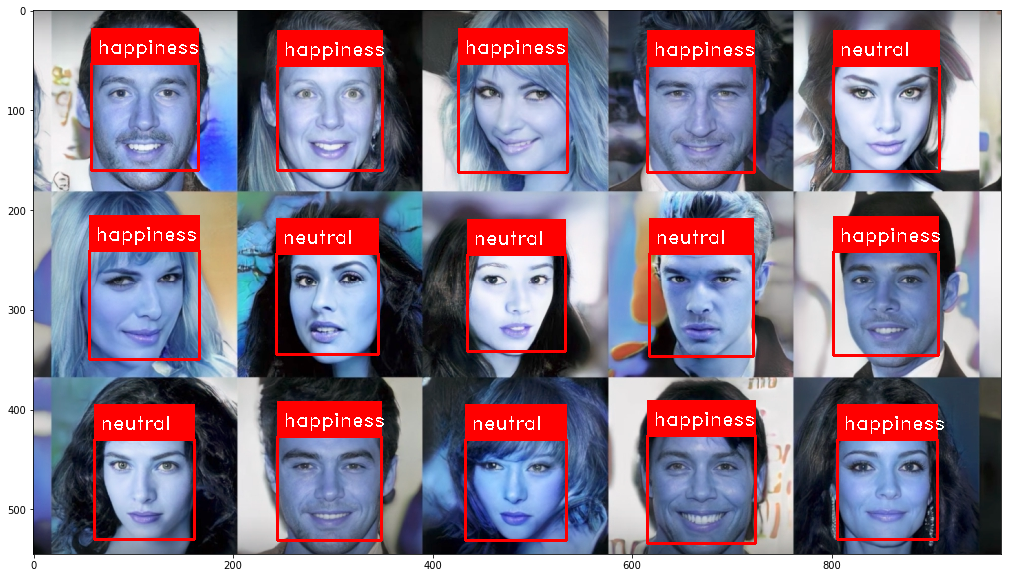

In [16]:
#cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.show()